In [1]:
import os

try:
    os.chdir('/Users/cha/Desktop/공모전/삼성화재X포스텍_리스크경진대회/내코드/data/')
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")

Directory changed


In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import timedelta

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [8]:
import platform
if platform.system() == 'Darwin': 
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': 
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_excel("예측모델data/브라질원두생산량.xlsx") # 데이터 파일 경로를 변경하세요.

# 'location'이 '브라질'인 데이터만 선택
data_brazil = data[data['location'] == 'Brazil']

# 'year'와 'month' 컬럼을 합쳐서 'Month' 컬럼 생성
data_brazil['Date'] = pd.to_datetime(data_brazil['year'].astype(str) + '-' + data_brazil['month'].astype(str), format='%Y-%m')

# 필요한 컬럼 선택
data_brazil = data_brazil[['Date', '생산량(톤)']]

# 'Month' 컬럼을 인덱스로 설정
data_brazil.set_index('Date', inplace=True)

In [12]:
data_brazil

,생산량(톤)
Date,
2006-09-01,2583027
2006-10-01,2593131
2006-11-01,2594203
2006-12-01,2585797
2007-01-01,2131590
...,...
2023-04-01,3313042
2023-05-01,3323413
2023-06-01,3305832


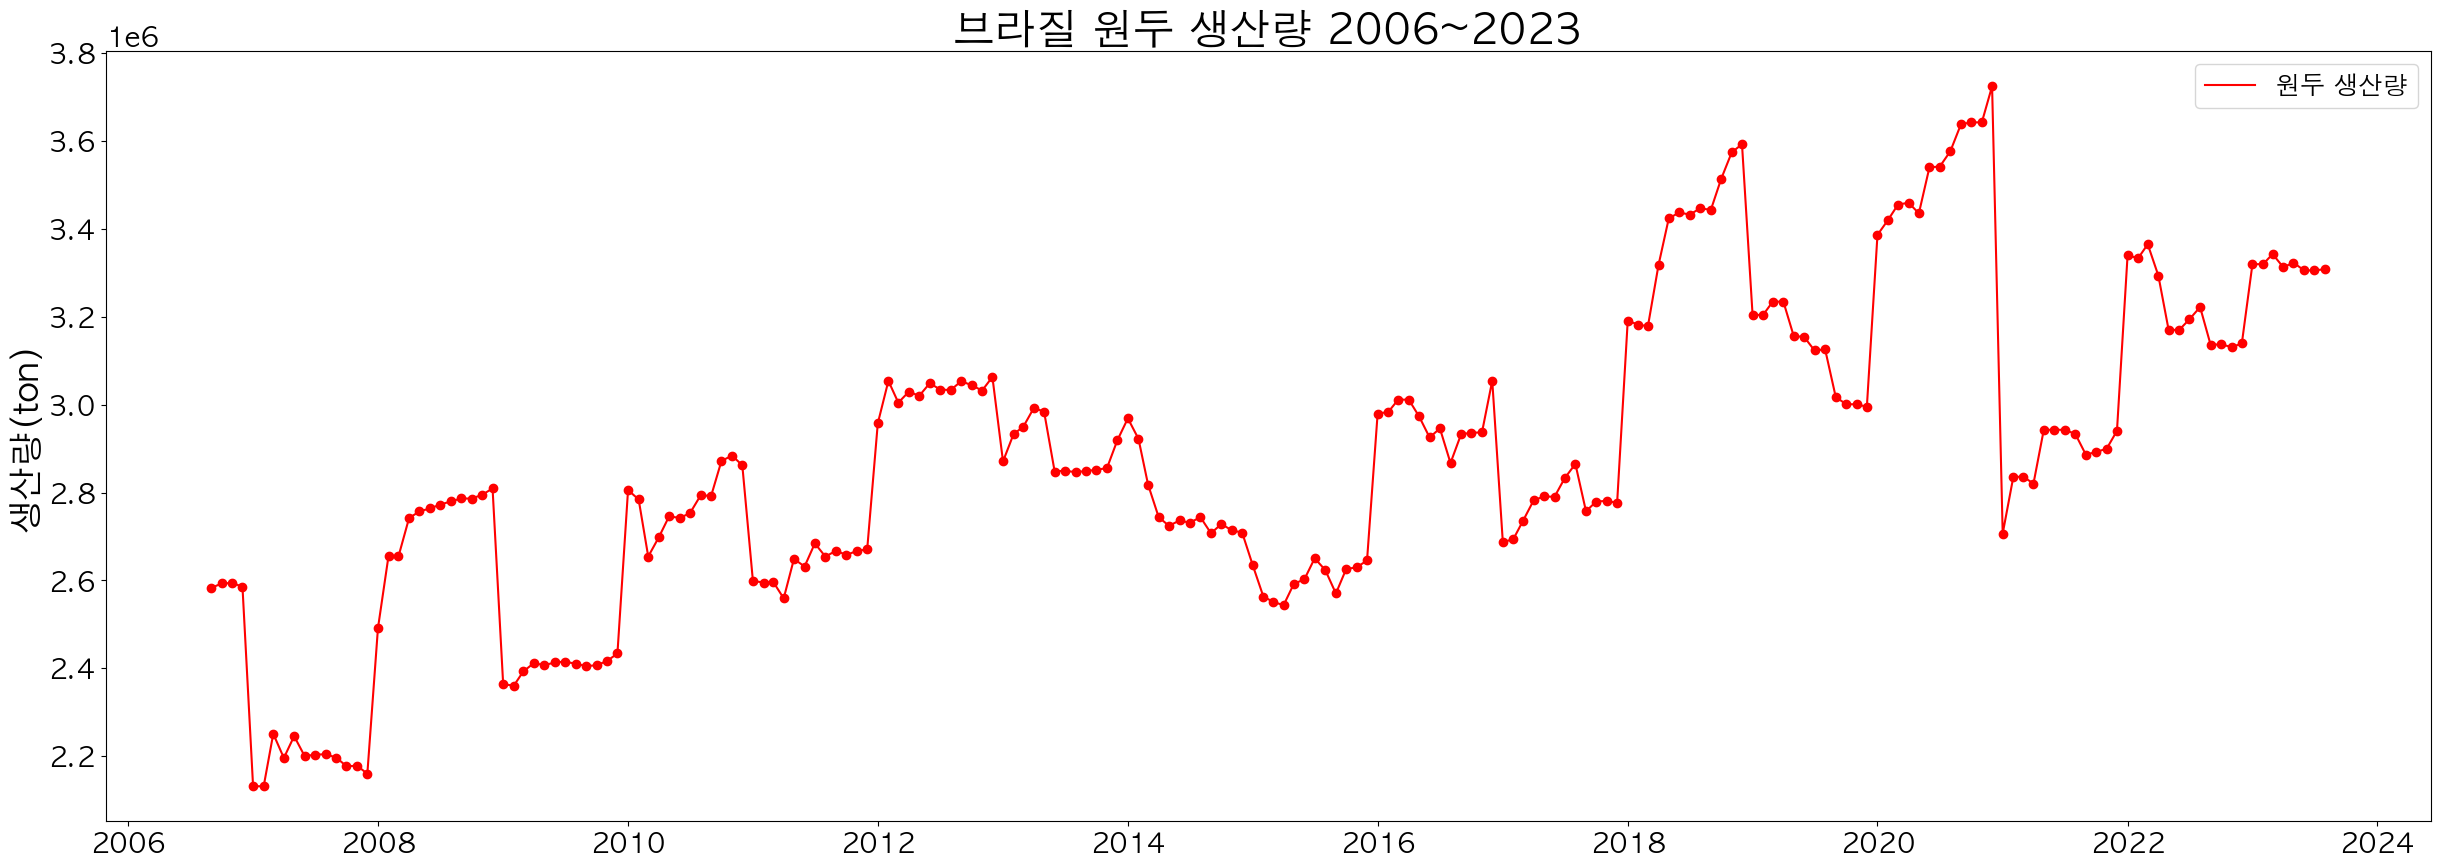

In [22]:
fig, ax1 = plt.subplots(figsize=(30, 10))

A = data_brazil
line1 = ax1.plot(A.index, A['생산량(톤)'], label='원두 생산량', color='r')
ax1.scatter(A.index, A['생산량(톤)'], label='원두 생산량', color='r')

#ax1.set_ylim([340, 385])
#plt.yticks([0, 10, 20, 30, 40, 50, 60, 3.1])

lines = line1
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('생산량(ton)', fontdict={'fontsize':25})

# plt.xticks(range(len(a))[::len(a)//300], a.index[::len(a)//300].strftime('%Y-%m'))
plt.title('브라질 원두 생산량 2006~2023', fontdict = {'fontsize' : 30})
plt.rcParams['font.size'] = 20
plt.show()

In [18]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

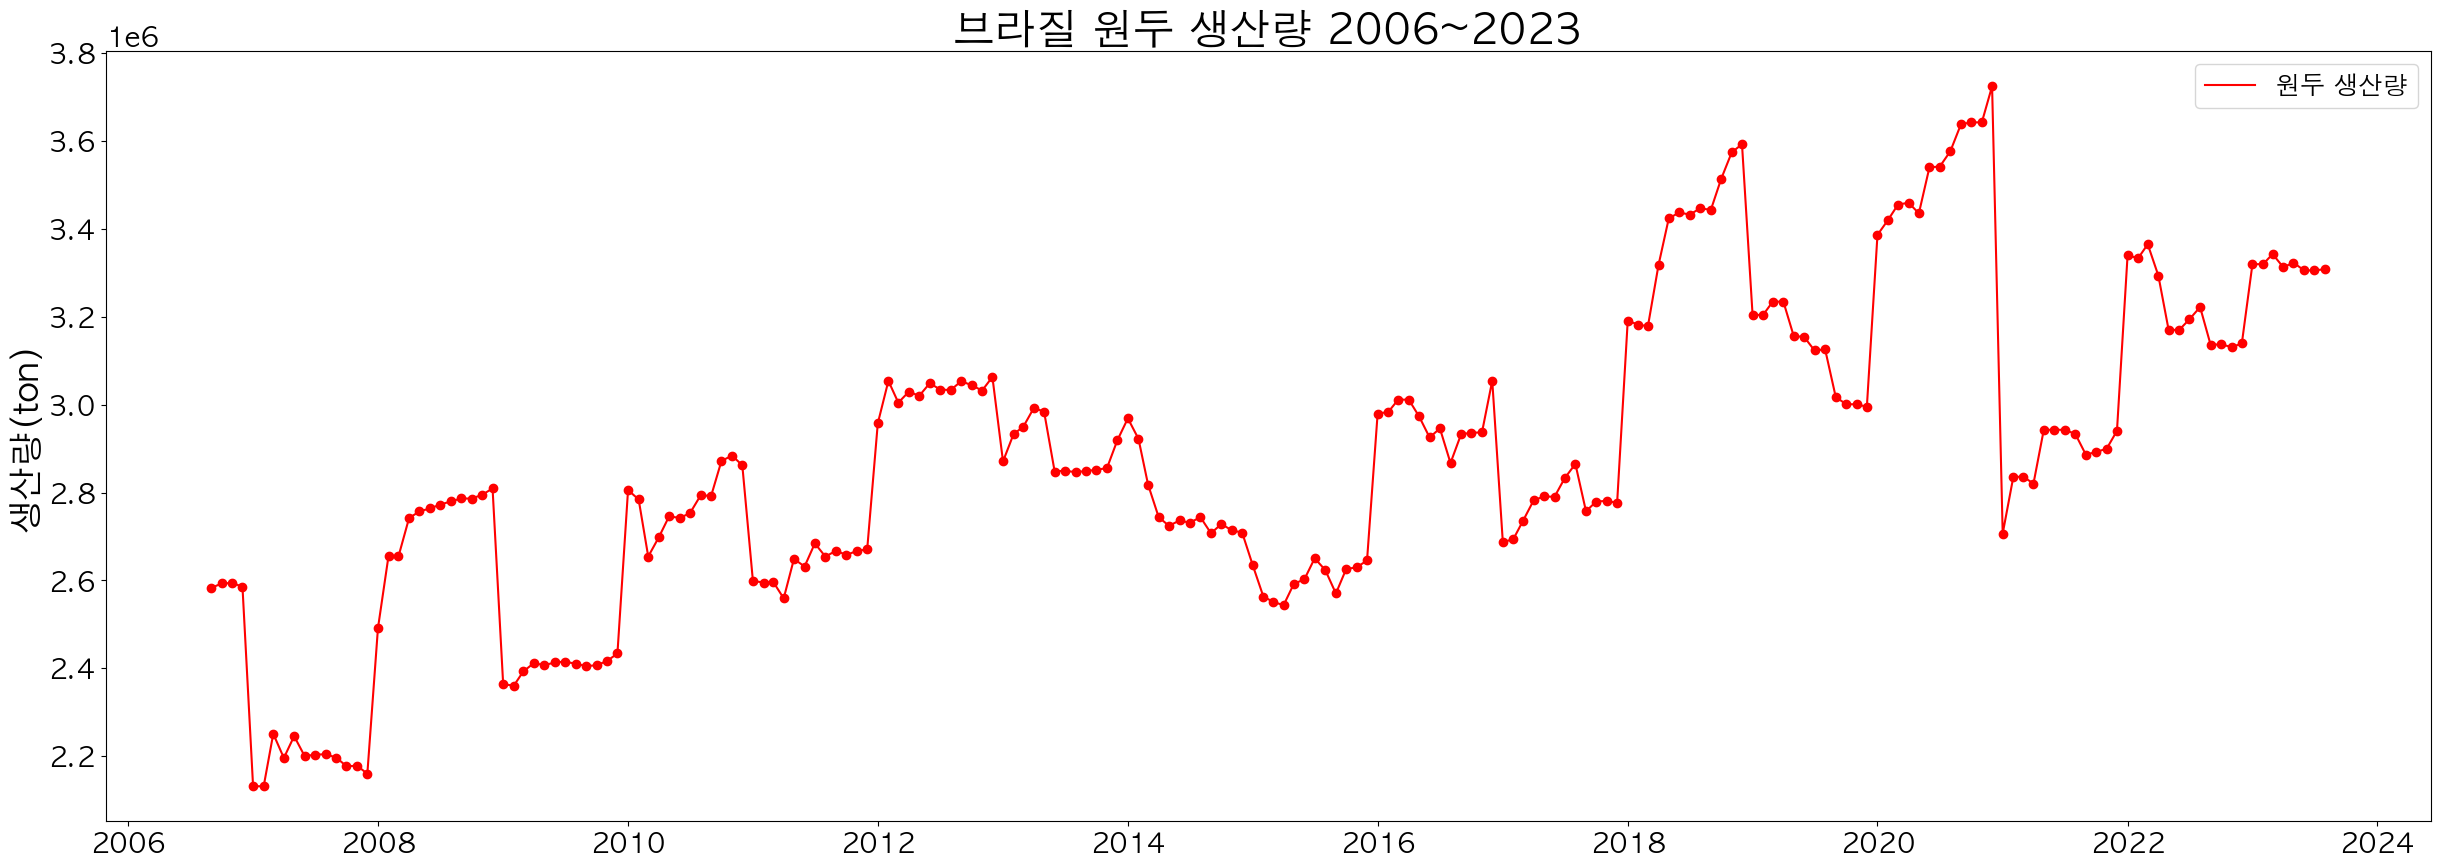

In [25]:
fig, ax1 = plt.subplots(figsize=(30, 10))

A = data_brazil
line1 = ax1.plot(A.index, A['생산량(톤)'], label='원두 생산량', color='r')
ax1.scatter(A.index, A['생산량(톤)'], label='원두 생산량', color='r')

#ax1.set_ylim([340, 385])
#plt.yticks([0, 10, 20, 30, 40, 50, 60, 3.1])

lines = line1
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('생산량(ton)', fontdict={'fontsize':25})

# plt.xticks(range(len(a))[::len(a)//300], a.index[::len(a)//300].strftime('%Y-%m'))
plt.title('브라질 원두 생산량 2006~2023', fontdict = {'fontsize' : 30})
plt.rcParams['font.size'] = 20
plt.show()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   month              816 non-null    int64 
 1   year               816 non-null    int64 
 2   location           816 non-null    object
 3   재배면적(헥타르)          816 non-null    int64 
 4   수확면적(헥타르)          816 non-null    int64 
 5   생산량(톤)             816 non-null    int64 
 6   평균 수확량(헥타르당 킬로그램)  816 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 44.8+ KB


In [41]:
data_sbrazil = data[data['location'] == 'Brazil']

In [42]:
data_sbrazil 

,month,year,location,재배면적(헥타르),수확면적(헥타르),생산량(톤),평균 수확량(헥타르당 킬로그램)
0,9,2006,Brazil,2541088,2343902,2583027,1102
4,10,2006,Brazil,2542552,2343158,2593131,1107
8,11,2006,Brazil,2542582,2343141,2594203,1107
12,12,2006,Brazil,2519266,2327813,2585797,1111
16,1,2007,Brazil,2517823,2318074,2131590,920
...,...,...,...,...,...,...,...
796,4,2023,Brazil,1938645,1918803,3313042,4068
800,5,2023,Brazil,1925173,1905321,3323413,4088
804,6,2023,Brazil,1931840,1911950,3305832,4014
808,7,2023,Brazil,1931929,1912039,3305765,4014


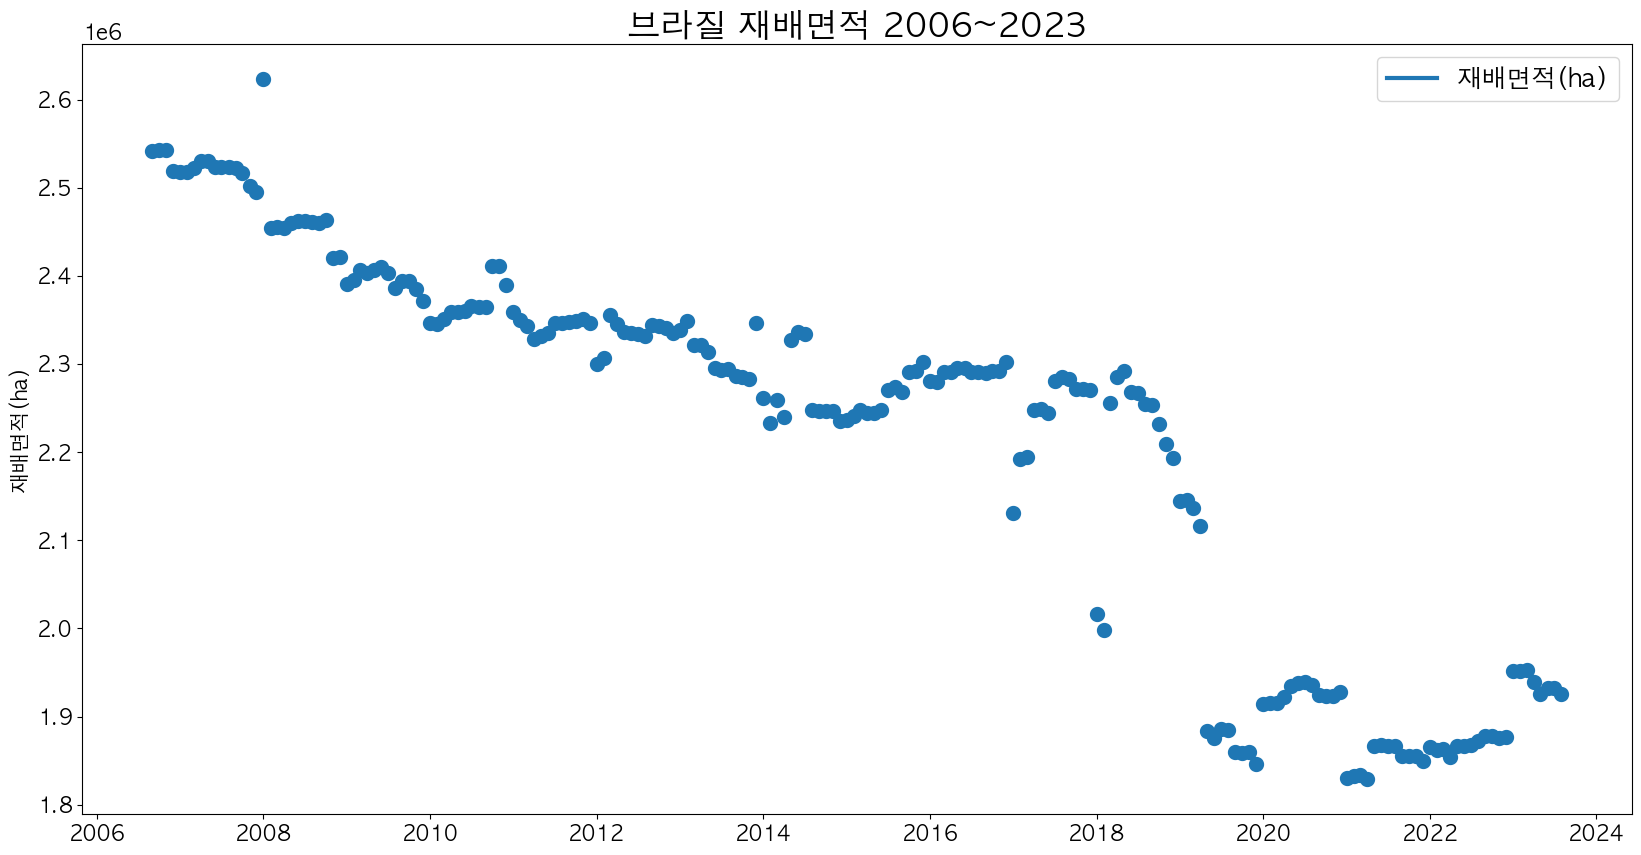

In [54]:
data_brazil = data[data['location'] == 'Brazil']

# 'year'와 'month' 컬럼을 합쳐서 'Month' 컬럼 생성
data_brazil['Date'] = pd.to_datetime(data_brazil['year'].astype(str) + '-' + data_brazil['month'].astype(str), format='%Y-%m')

# 필요한 컬럼 선택
data_brazil = data_brazil[['Date', '재배면적(헥타르)']]

# 'Month' 컬럼을 인덱스로 설정
data_brazil.set_index('Date', inplace=True)

# 데이터 시각화
A = data_brazil
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.scatter(A.index, A['재배면적(헥타르)'], label='재배면적(ha)', linewidth=5)
# ax1.scatter(data_sbrazil.index, data_sbrazil['재배면적(헥타르)'], label='재배면적(ha)')
ax1.set_ylabel('재배면적(ha)', fontdict={'fontsize':15})

lines = line1
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
# plt.xticks(A.index[::20], rotation=0)
plt.title('브라질 재배면적 2006~2023', fontdict = {'fontsize' : 24})
plt.rcParams['font.size'] = 15
plt.show()

# X = data_sbrazil[['Date']]
# y = data_sbrazil['재배면적(헥타르)']

# # 선형 회귀 모델 학습
# model = LinearRegression()
# model.fit(X, y)

# # 추세 기울기와 절편 출력
# slope = model.coef_[0]
# intercept = model.intercept_
# print(f'추세 기울기 (slope): {slope:.2f}')
# print(f'추세 절편 (intercept): {intercept:.2f}')

In [56]:
data_brazil.reset_index(inplace=True)

In [57]:
years_in_future = range(1, 31)  # 1년 후부터 30년 후까지
future_years = [data_brazil['Date'].max() + years for years in years_in_future]
predicted_productions = model.predict(np.array(future_years).reshape(-1, 1))

# 예측 결과를 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.scatter(data_brazil['Date'], data_brazil['생산량(톤)'], label='Data')
plt.plot(future_years, predicted_productions, 'r--', label='Predictions')
plt.title('Brazil Coffee Production Over Time with Predictions')
plt.xlabel('Year')
plt.ylabel('Production (Tons)')
plt.legend()
plt.show()

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

C:\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


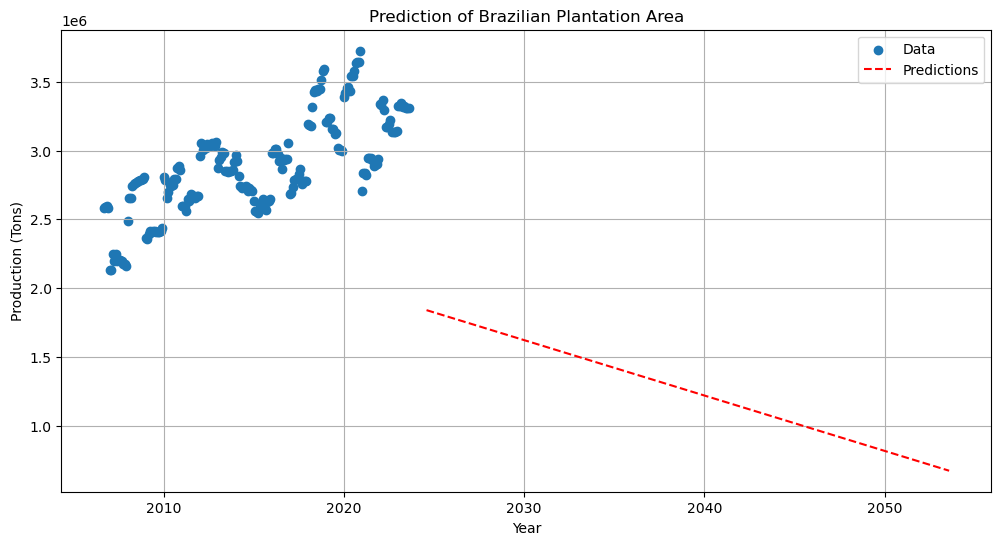

In [37]:
years_in_future = range(1, 31)  # 1년 후부터 30년 후까지
future_years = [data_sbrazil['Date'].max() + years for years in years_in_future]
predicted_productions = model.predict(np.array(future_years).reshape(-1, 1))

# 예측 결과를 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.scatter(data_sbrazil['Date'], data_brazil['생산량(톤)'], label='Data')
plt.plot(future_years, predicted_productions, 'r--', label='Predictions')
plt.title('Prediction of Brazilian Plantation Area')
plt.xlabel('Year')
plt.ylabel('Production (Tons)')
plt.legend()
plt.grid(True)
plt.show()